# EDA
# Análisis Exploratorio de Datos sobre el Cáncer de Mama

## Conjunto de datos

Este conjunto de datos contiene información sobre tumores de cáncer de mama, desarrollado originalmente por el Dr. William H. Wolberg. Fue diseñado para asistir a investigadores y profesionales en el campo del aprendizaje automático en la clasificación de tumores, distinguiéndolos como malignos (cancerosos) o benignos (no cancerosos). La base de datos cuenta con 569 observaciones y 33 variables (12 variables, 10 de ellas agregadas cada una en 3 diferentes medidas estadísticas: promedio, error estándar y peor valor)

### Variables



1. Número de identificación
2. Diagnóstico (M = maligno, B = benigno).
3. Radio (la media de las distancias desde el centro hasta los puntos del perímetro).
4. Textura (la desviación estándar de los valores de la escala de grises).
5. Perímetro
6. Área
7. Suavidad (la variación local en las longitudes de los radios).
8. Compacidad (el perímetro^2 / área - 1.0).
9. Concavidad (la severidad de las porciones cóncavas del contorno).
10. Puntos cóncavos (el número de porciones cóncavas del contorno).
11. Simetría
12. Dimensión fractal ("aproximación a la línea de costa" - 1).

# Código de la Data 

In [5]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("data.csv", delimiter=",", quotechar='"')
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [7]:
# Identificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [8]:
# Eliminar  columna con datos faltantes
df.drop(columns=["Unnamed: 32"])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Estadísticas Descriptivas


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Las estadísticas descriptivas muestran las medidas centrales y de dispersión de varias características. La variable id tiene una media muy alta debido a que representa identificadores numéricos únicos de gran valor (no es relevante). Para radius_mean, el promedio es 14.13 con una desviación estándar de 3.52, indicando que la mayoría de los datos están entre 10.6 y 17.6. En texture_mean, la media es 19.29 con una desviación de 4.30, lo que refleja mayor variabilidad en la textura; perimeter_meany y area_mean presentan medias de 91.97 y 654.89, respectivamente, con áreas que varían significativamente, desde 143.5 hasta 2501, evidenciando gran heterogeneidad en el tamaño de los tumores. 

Las medidas de forma ( smoothness_mean, compactness_mean, concavity_mean, concave points_mean) son más pequeñas, con promedios que oscilan entre 0.048 y 0.18, lo que sugiere que estos valores son bajos en relación a las otras características. Las métricas de variación, como radius_sey area_se, tienen medias más bajas y reflejando menor dispersión, pero presentan valores atípicos significativos, como los máximos de los errores estándar del area y del perímetro, indicando variabilidad en la precisión de medición. 

Por último, las versiones "peores" (peor valor observado) de las variables muestran valores significativamente mayores en promedio que las versiones "mean", lo cual sugiere que algunos tumores presentan características extremas en ciertos casos, especialmente en tamaño ( radius_worsty area_worst) y compactación. ( compactness_worsty concavity_worst). Esto destaca la diversidad en las características de los tumores y potenciales diferencias entre tumores benignos y malignos.

### Histograma de distribución

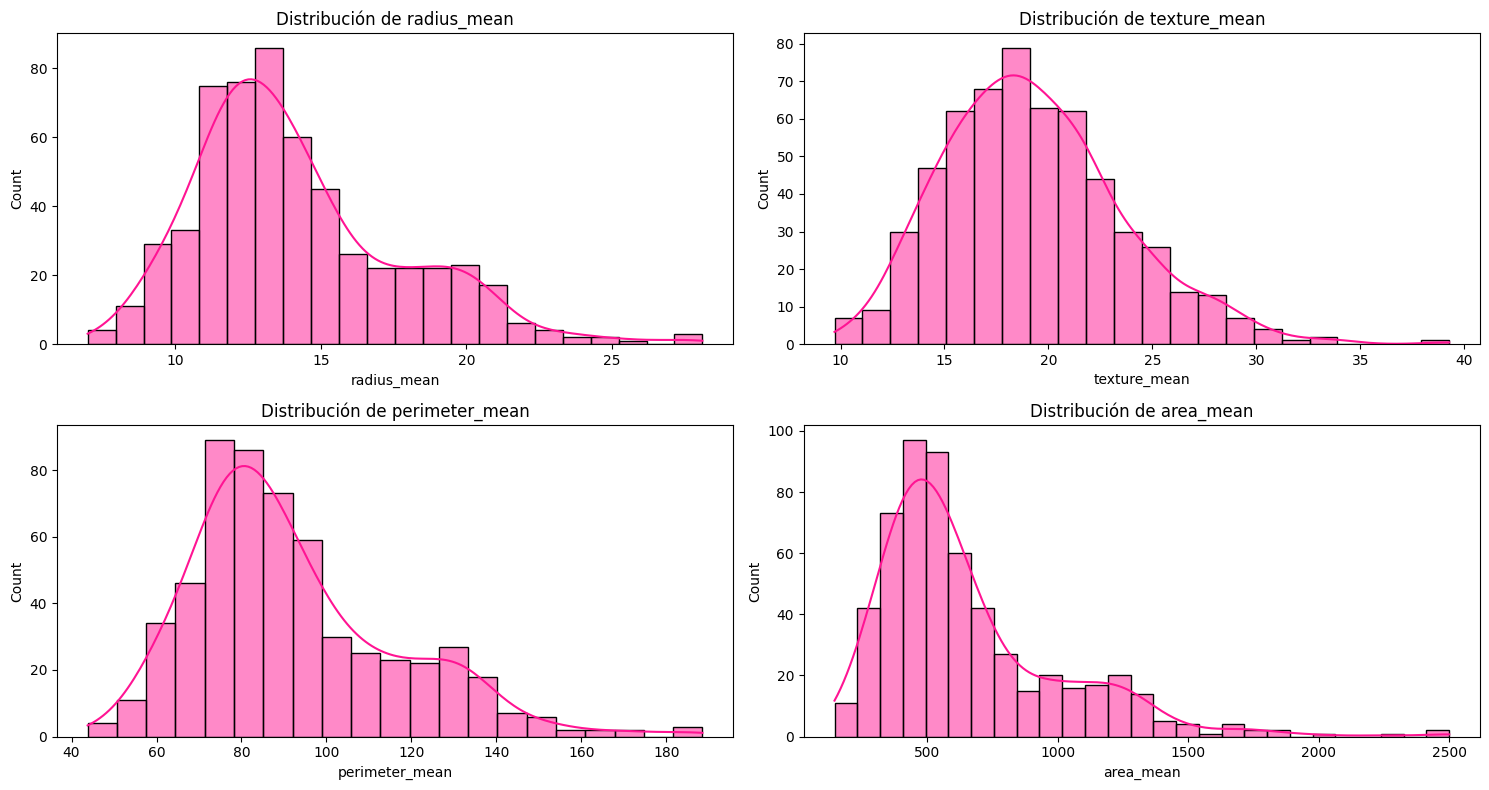

In [10]:
variables = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize = (15, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], kde = True, color = "deeppink")
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

Los gráficos muestran la distribución de cuatro variables del conjunto de datos de cáncer de mama: radius_mean, texture_mean, perimeter_meany area_mean. Todas presentan una distribución asimétrica positiva, con mayor concentración de valores en rangos moderados y colas largas hacia la derecha. La variable radius_mean tiene la mayoría de los valores entre 10 y 20, mientras que texture_mean está concentrada entre 15 y 25. perimeter_meanpresenta una distribución similar a radius_mean, con la mayoría de los valores entre 50 y 120, y area_mean muestra la mayor asimetría, con la mayoría de los valores inferiores a 1000 y algunos valores mucho mayores. Esta asimetría sugiere la presencia de valores atípicos en los extremos superiores, posiblemente asociados a tumores de mayor tamaño o características menos comunes, lo que podría requerir normalización o transformaciones para un análisis más preciso.

### Gráfico de barras 

<Figure size 1000x600 with 0 Axes>

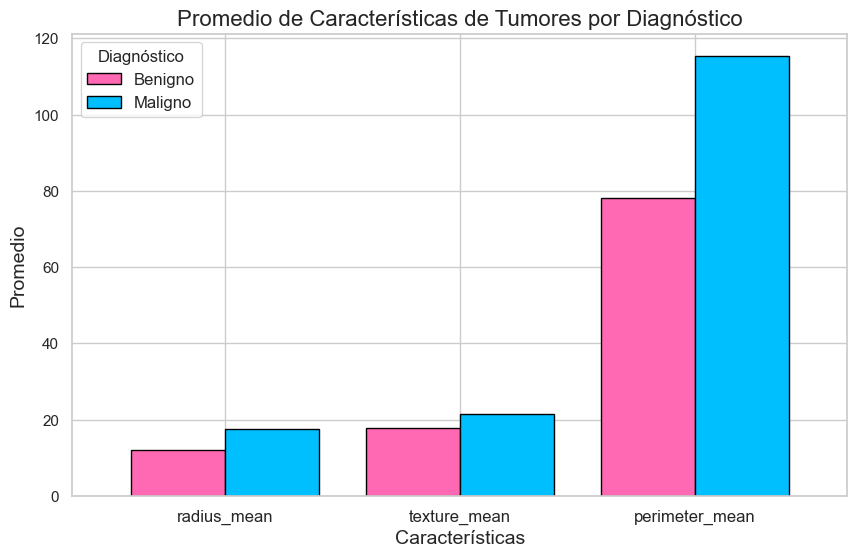

In [11]:
sns.set(style="whitegrid")
variabless = ['radius_mean', 'texture_mean', 'perimeter_mean']
means = df.groupby('diagnosis')[variabless].mean()

plt.figure(figsize=(10, 6))
means.T.plot(kind='bar', figsize=(10, 6), color=['hotpink', 'deepskyblue'], width=0.8, edgecolor='black')
plt.title("Promedio de Características de Tumores por Diagnóstico", fontsize=16)
plt.xlabel("Características", fontsize=14)
plt.ylabel("Promedio", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(["Benigno", "Maligno"], title="Diagnóstico", fontsize=12)
plt.show()


El gráfico de barras muestra el promedio de tres características de los tumores de mama, clasificados según su diagnóstico. Se observa que, en promedio, los tumores malignos tienen valores más altos en las tres características comparadas. La diferencia es particularmente notable en el perímetro promedio, donde los tumores malignos presentan un valor considerablemente mayor en comparación con los benignos, lo que indica que los tumores malignos suelen ser de mayor tamaño y extensión. Estas diferencias en las características promedio entre tumores benignos y malignos sugieren que el tamaño y otras propiedades físicas del tumor podrían ser indicadores relevantes en la clasificación y diagnóstico de tumores de mama.

### Gráfico de Caja (Detectar si hay valores atípicos)

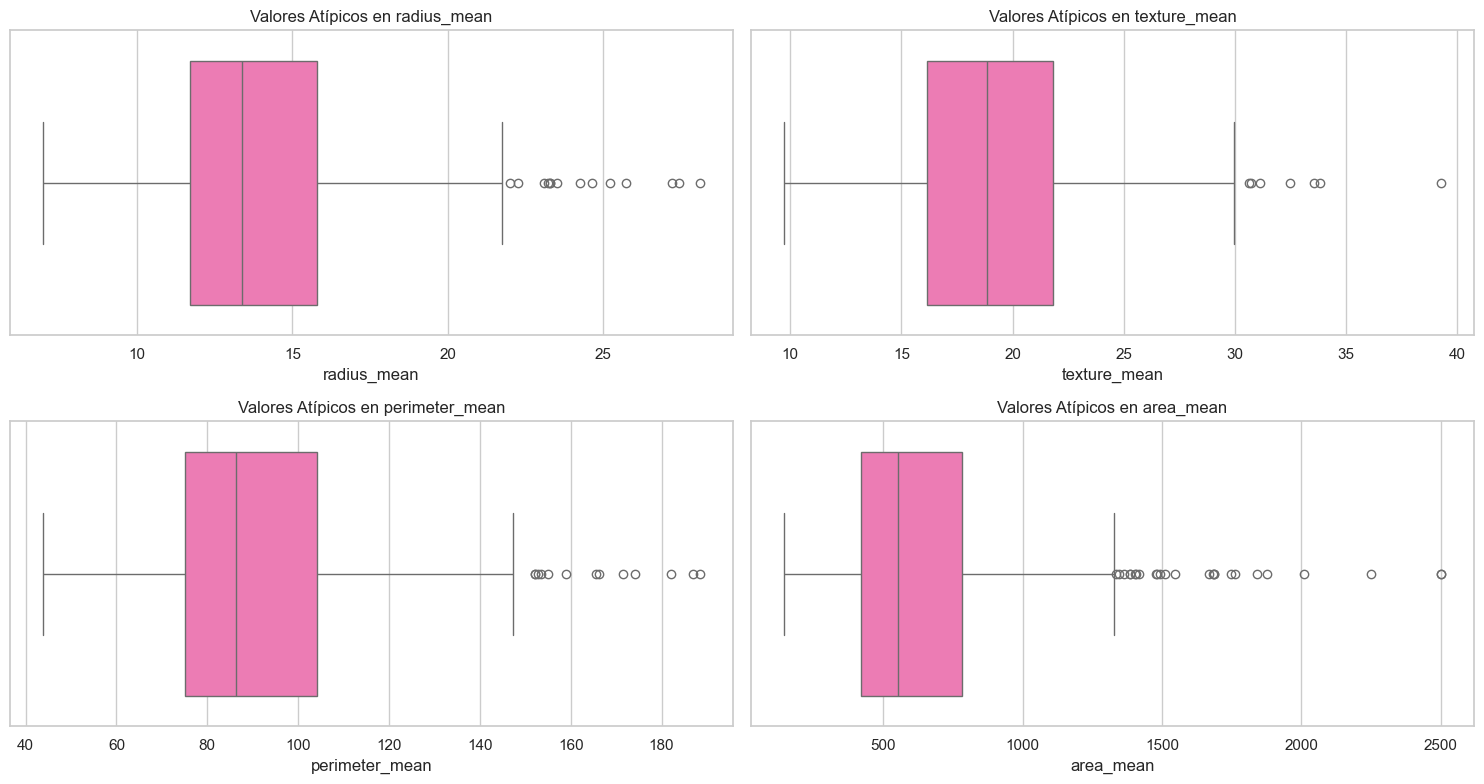

In [12]:
plt.figure(figsize=(15, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[var], color = "hotpink")
    plt.title(f'Valores Atípicos en {var}')
plt.tight_layout()
plt.show()

Los diagramas de caja de las variables seleccionadas, destacan la presencia de valores atípicos que indican características inusuales en algunos tumores. En radius_mean, la mayoría de los datos se concentran entre 10 y 17, pero algunos valores superan los 20, mostrando un radio promedio significativamente mayor. En texture_mean, la mayoría de los valores se encuentra entre 10 y 25, con algunos valores atípicos por encima de 30, lo que sugiere texturas inusuales en ciertos tumores. Para perimeter_mean, los datos oscilan entre 40 y 140, aunque hay valores atípicos por encima de 150, indicando perímetros notablemente más grandes en algunos casos. Finalmente, area_mean presenta valores principales entre 100 y 1000, pero con una gran cantidad de valores atípicos por encima de 1500, alcanzando hasta 2500, lo que sugiere áreas mucho mayores en algunos tumores. En conjunto, estos valores atípicos resaltan la variabilidad y posibles características extremas en ciertos tumores dentro del conjunto de datos.


### Gráfico de dispersión

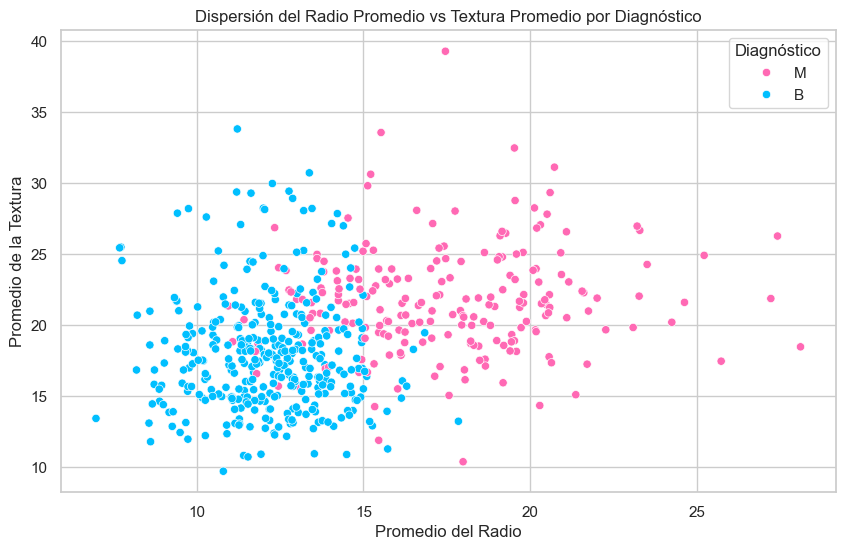

In [13]:
plt.figure(figsize=(10, 6))
colores = {'M': 'hotpink', 'B': 'deepskyblue'}
sns.scatterplot(data = df, x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', palette = colores )
plt.title('Dispersión del Radio Promedio vs Textura Promedio por Diagnóstico')
plt.xlabel('Promedio del Radio')  
plt.ylabel('Promedio de la Textura')
plt.legend(title='Diagnóstico')
plt.show()


En el gráfico de dispersión se observa la relación entre el promedio del radio ( radius_mean) y el promedio de la textura ( texture_mean) de los tumores, diferenciando los diagnósticos malignos y benignos. Los puntos en color rosa representan tumores malignos ("M"), mientras que los puntos en color azul representan tumores benignos ("B"). A medida que aumentan los valores de radius_meany texture_mean, predominan los tumores malignos, lo que sugiere que estos suelen tener un tamaño y una textura mayores. Sin embargo, existe una superposición en el rango de valores de radio entre 10 y 15, y en el de textura entre 15 y 25, donde se encuentran tanto tumores benignos como malignos. Esto indica que, aunque ambas variables ayudan a distinguir entre los dos tipos de tumores, no son suficientes por sí solas para separarlos completamente y es probable que se requieran otras variables para lograr una clasificación más precisa. En conclusión, el análisis sugiere que los tumores más grandes y con mayor textura tienden a ser malignos, aunque se necesitaría un análisis más completo para confirmar esta relación y mejorar la precisión en la clasificación.

### Gráfico de tortas

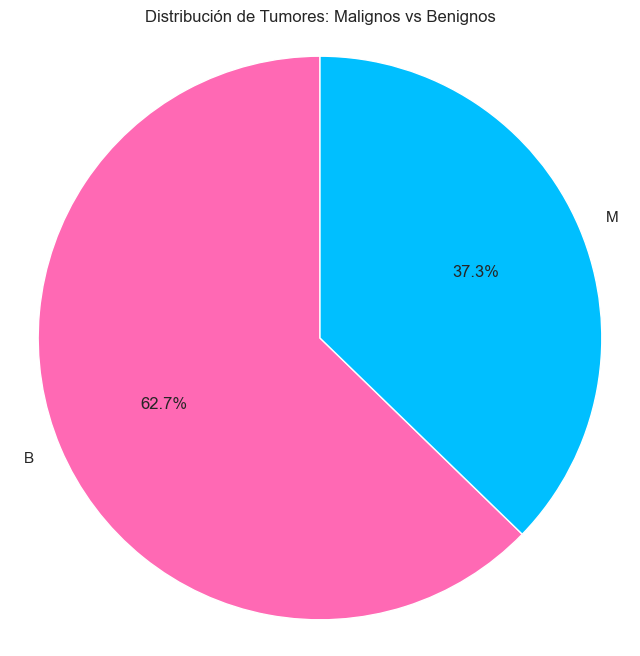

In [14]:
diagnosis_counts = df['diagnosis'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=['hotpink', 'deepskyblue'])
plt.title('Distribución de Tumores: Malignos vs Benignos')
plt.axis('equal')
plt.show()

El gráfico de torta muestra que, en el conjunto de datos analizados, el 62.7% de los tumores son benignos, mientras que el 37.3% son malignos. Esta distribución sugiere que, en esta muestra, los tumores benignos son casi dos tercios del total, lo cual es una proporción significativa. La diferencia en frecuencias entre tumores benignos y malignos puede proporcionar una base para desarrollar modelos de clasificación que identifiquen características asociadas a cada tipo de tumor. Este equilibrio también puede ayudar a ajustar los parámetros de un modelo de aprendizaje automático, al tiempo que permite priorizar la detección temprana y precisa de características relacionadas.

En particular, en el gráfico de dispersión se observa que los tumores malignos suelen tener valores más altos en ambas dimensiones (radio y textura), lo cual es coherente con la proporción identificada en el gráfico de torta: aunque la mayoría de los tumores son benignos. , los más grandes y con mayor textura tienden a ser malignos. Sin embargo, la superposición entre los valores de radio y textura para algunos tumores benignos y malignos sugiere que estas dos variables, por sí solas, no son completamente predictivas, y podría ser necesario considerar otras características para lograr una clasificación más precisa y confiable en la detección de tumores malignos. En conjunto, estos análisis iniciales ofrecen una guía para enfocar futuras investigaciones y seleccionar variables adicionales para mejorar el modelo de clasificación.

### Mapa de Calor

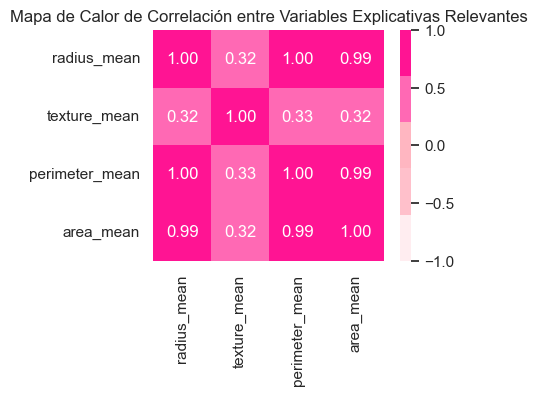

In [15]:
variables_relevantes = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']]
rosa_paleta = ["#FFEDF0", "#FFC0CB", "#FFB6C1", "#FF69B4", "#FF1493"]
correlacion = variables_relevantes.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlacion, annot=True, cmap= rosa_paleta, vmin=-1, vmax=1, square=True, fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Explicativas Relevantes')
plt.show()

El mapa de calor muestra una alta valoración entre las variables radius_mean, perimeter_meany area_mean, con valores muy cercanos a 1. Esto indica que, en este conjunto de datos de tumores de cáncer de mama, a medida que el radio promedio de los tumores aumenta, también lo hacen el perímetro y el área promedio. Sin embargo, la texture_meanpresenta una valoración más baja con las otras tres variables, lo cual sugiere que la textura puede aportar una dimensión adicional al análisis, ya que no está tan estrechamente relacionada con el tamaño como las otras. Relacionando estos resultados con el gráfico de dispersión anterior, podemos inferir que los tumores malignos tienden a tener valores altos en radius_mean, perimeter_meany area_mean, indicando que suelen ser de mayor tamaño. Además, el gráfico de tortas refuerza esta conclusión, ya que mostró que el 37.3% de los tumores son malignos y el 62.7% son benignos. Aunque estas variables de tamaño y textura aportan información útil, no son suficientes por sí solas para distinguir claramente entre tumores malignos y benignos, destacando la importancia de un análisis más integral para mejorar la precisión en la clasificación.

# Conclusiones


El análisis del conjunto de datos de cáncer de mama revela importantes características sobre los tumores, que pueden ser útiles para la clasificación entre malignos y benignos. La mayoría de las variables relacionadas con el tamaño de los tumores, como radio_medio , perímetro_medio y área_medio , muestran una alta dispersión, lo que indica una considerable heterogeneidad en las características de los tumores. Aunque las variables de tamaño tienen una fuerte recomendación entre sí, textura_mean se presenta como una variable menos correlacionada, lo que sugiere que contribuye de manera diferente al análisis. Los gráficos de dispersión y los diagramas de caja confirman que existen valores atípicos en varias de estas variables, lo que puede influir en los modelos predictivos si no se gestionan adecuadamente. Los tumores malignos tienden a tener valores más altos en radio_mean y textura_mean , lo que podría ayudar a diferenciarlos de los tumores benignos, aunque la superposición entre los valores de estas variables muestra que no son suficientes por sí solas para hacer una clasificación precisa.

La distribución de los tumores en el conjunto de datos muestra que un 62,7% de los tumores son benignos y un 37,3% malignos, lo que implica un desequilibrio en las clases. Este desequilibrio es importante tenerlo en cuenta al construir modelos de clasificación, ya que podría afectar su rendimiento. Además, la relación observada entre la radio, el perímetro y el área sugiere que los tumores más grandes tienen tendencia a ser malignos, aunque la clasificación requiere la consideración de más variables y el uso de modelos más complejos para capturar la interacción entre ellas.